In [1]:
import numpy as np
import pandas as pd
import random
import re
import string
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from collections import Counter



In [2]:
# Load and preprocess
tweets = open('/content/bbchealth.txt', encoding='utf8').readlines()

In [3]:
tweets

['585978391360221184|Thu Apr 09 01:31:50 +0000 2015|Breast cancer risk test devised http://bbc.in/1CimpJF\n',
 '585947808772960257|Wed Apr 08 23:30:18 +0000 2015|GP workload harming care - BMA poll http://bbc.in/1ChTBRv\n',
 "585947807816650752|Wed Apr 08 23:30:18 +0000 2015|Short people's 'heart risk greater' http://bbc.in/1ChTANp\n",
 "585866060991078401|Wed Apr 08 18:05:28 +0000 2015|New approach against HIV 'promising' http://bbc.in/1E6jAjt\n",
 "585794106170839041|Wed Apr 08 13:19:33 +0000 2015|Coalition 'undermined NHS' - doctors http://bbc.in/1CnLwK7\n",
 '585733482413891584|Wed Apr 08 09:18:39 +0000 2015|Review of case against NHS manager http://bbc.in/1Ffj6ci\n',
 "585733481608646657|Wed Apr 08 09:18:39 +0000 2015|VIDEO: 'All day is empty, what am I going to do?' http://bbc.in/1N7wSSz\n",
 "585701601131765761|Wed Apr 08 07:11:58 +0000 2015|VIDEO: 'Overhaul needed' for end-of-life care http://bbc.in/1CmrRu3\n",
 "585620828110397440|Wed Apr 08 01:51:00 +0000 2015|Care for dying 

In [4]:
tweets = [t[50:].strip() for t in tweets]

In [5]:
tweets

['Breast cancer risk test devised http://bbc.in/1CimpJF',
 'GP workload harming care - BMA poll http://bbc.in/1ChTBRv',
 "Short people's 'heart risk greater' http://bbc.in/1ChTANp",
 "New approach against HIV 'promising' http://bbc.in/1E6jAjt",
 "Coalition 'undermined NHS' - doctors http://bbc.in/1CnLwK7",
 'Review of case against NHS manager http://bbc.in/1Ffj6ci',
 "VIDEO: 'All day is empty, what am I going to do?' http://bbc.in/1N7wSSz",
 "VIDEO: 'Overhaul needed' for end-of-life care http://bbc.in/1CmrRu3",
 "Care for dying 'needs overhaul' http://bbc.in/1FdSGrl",
 'VIDEO: NHS: Labour and Tory key policies http://bbc.in/1Ci5eqD',
 'Have GP services got worse? http://bbc.in/1Ci5c22',
 'A&amp;E waiting hits new worst level http://bbc.in/1Fa4Xgz',
 'Parties row over GP opening hours http://bbc.in/1CfcVOb',
 'Why strenuous runs may not be so bad after all http://bbc.in/1Ceq0Y7',
 'VIDEO: Health surcharge for non-EU patients http://bbc.in/1C5Mlbk',
 "VIDEO: Skin cancer spike 'from 60s h

In [6]:
tweets = [re.sub(r'http\S+|www\S+', '', t) for t in tweets]

In [7]:
tweets

['Breast cancer risk test devised ',
 'GP workload harming care - BMA poll ',
 "Short people's 'heart risk greater' ",
 "New approach against HIV 'promising' ",
 "Coalition 'undermined NHS' - doctors ",
 'Review of case against NHS manager ',
 "VIDEO: 'All day is empty, what am I going to do?' ",
 "VIDEO: 'Overhaul needed' for end-of-life care ",
 "Care for dying 'needs overhaul' ",
 'VIDEO: NHS: Labour and Tory key policies ',
 'Have GP services got worse? ',
 'A&amp;E waiting hits new worst level ',
 'Parties row over GP opening hours ',
 'Why strenuous runs may not be so bad after all ',
 'VIDEO: Health surcharge for non-EU patients ',
 "VIDEO: Skin cancer spike 'from 60s holidays' ",
 "80,000 'might die' in future outbreak ",
 "Skin cancer 'linked to holiday boom' ",
 "Public 'back tax rises to fund NHS' ",
 'VIDEO: Welcome to the designer asylum ',
 'VIDEO: Why are we having less sex? ',
 'Five ideas to transform the NHS ',
 "Personal cancer vaccines 'exciting' ",
 "Child heart su

In [8]:
tweets = [re.sub(r'@\w+', '', t) for t in tweets]

In [9]:
tweets

['Breast cancer risk test devised ',
 'GP workload harming care - BMA poll ',
 "Short people's 'heart risk greater' ",
 "New approach against HIV 'promising' ",
 "Coalition 'undermined NHS' - doctors ",
 'Review of case against NHS manager ',
 "VIDEO: 'All day is empty, what am I going to do?' ",
 "VIDEO: 'Overhaul needed' for end-of-life care ",
 "Care for dying 'needs overhaul' ",
 'VIDEO: NHS: Labour and Tory key policies ',
 'Have GP services got worse? ',
 'A&amp;E waiting hits new worst level ',
 'Parties row over GP opening hours ',
 'Why strenuous runs may not be so bad after all ',
 'VIDEO: Health surcharge for non-EU patients ',
 "VIDEO: Skin cancer spike 'from 60s holidays' ",
 "80,000 'might die' in future outbreak ",
 "Skin cancer 'linked to holiday boom' ",
 "Public 'back tax rises to fund NHS' ",
 'VIDEO: Welcome to the designer asylum ',
 'VIDEO: Why are we having less sex? ',
 'Five ideas to transform the NHS ',
 "Personal cancer vaccines 'exciting' ",
 "Child heart su

In [10]:
tweets = [t.replace('#', '') for t in tweets]

In [11]:
tweets

['Breast cancer risk test devised ',
 'GP workload harming care - BMA poll ',
 "Short people's 'heart risk greater' ",
 "New approach against HIV 'promising' ",
 "Coalition 'undermined NHS' - doctors ",
 'Review of case against NHS manager ',
 "VIDEO: 'All day is empty, what am I going to do?' ",
 "VIDEO: 'Overhaul needed' for end-of-life care ",
 "Care for dying 'needs overhaul' ",
 'VIDEO: NHS: Labour and Tory key policies ',
 'Have GP services got worse? ',
 'A&amp;E waiting hits new worst level ',
 'Parties row over GP opening hours ',
 'Why strenuous runs may not be so bad after all ',
 'VIDEO: Health surcharge for non-EU patients ',
 "VIDEO: Skin cancer spike 'from 60s holidays' ",
 "80,000 'might die' in future outbreak ",
 "Skin cancer 'linked to holiday boom' ",
 "Public 'back tax rises to fund NHS' ",
 'VIDEO: Welcome to the designer asylum ',
 'VIDEO: Why are we having less sex? ',
 'Five ideas to transform the NHS ',
 "Personal cancer vaccines 'exciting' ",
 "Child heart su

In [12]:
tweets = [t.translate(str.maketrans('', '', string.punctuation)) for t in tweets]

In [13]:
tweets

['Breast cancer risk test devised ',
 'GP workload harming care  BMA poll ',
 'Short peoples heart risk greater ',
 'New approach against HIV promising ',
 'Coalition undermined NHS  doctors ',
 'Review of case against NHS manager ',
 'VIDEO All day is empty what am I going to do ',
 'VIDEO Overhaul needed for endoflife care ',
 'Care for dying needs overhaul ',
 'VIDEO NHS Labour and Tory key policies ',
 'Have GP services got worse ',
 'AampE waiting hits new worst level ',
 'Parties row over GP opening hours ',
 'Why strenuous runs may not be so bad after all ',
 'VIDEO Health surcharge for nonEU patients ',
 'VIDEO Skin cancer spike from 60s holidays ',
 '80000 might die in future outbreak ',
 'Skin cancer linked to holiday boom ',
 'Public back tax rises to fund NHS ',
 'VIDEO Welcome to the designer asylum ',
 'VIDEO Why are we having less sex ',
 'Five ideas to transform the NHS ',
 'Personal cancer vaccines exciting ',
 'Child heart surgery deaths halved ',
 'VIDEO Miliband Cam

In [14]:
tweets = [t.lower().strip() for t in tweets if t.strip()]

In [15]:
tweets

['breast cancer risk test devised',
 'gp workload harming care  bma poll',
 'short peoples heart risk greater',
 'new approach against hiv promising',
 'coalition undermined nhs  doctors',
 'review of case against nhs manager',
 'video all day is empty what am i going to do',
 'video overhaul needed for endoflife care',
 'care for dying needs overhaul',
 'video nhs labour and tory key policies',
 'have gp services got worse',
 'aampe waiting hits new worst level',
 'parties row over gp opening hours',
 'why strenuous runs may not be so bad after all',
 'video health surcharge for noneu patients',
 'video skin cancer spike from 60s holidays',
 '80000 might die in future outbreak',
 'skin cancer linked to holiday boom',
 'public back tax rises to fund nhs',
 'video welcome to the designer asylum',
 'video why are we having less sex',
 'five ideas to transform the nhs',
 'personal cancer vaccines exciting',
 'child heart surgery deaths halved',
 'video miliband cameron failed the nhs',
 '

In [16]:
tweets = [t.split() for t in tweets]

In [17]:
tweets

[['breast', 'cancer', 'risk', 'test', 'devised'],
 ['gp', 'workload', 'harming', 'care', 'bma', 'poll'],
 ['short', 'peoples', 'heart', 'risk', 'greater'],
 ['new', 'approach', 'against', 'hiv', 'promising'],
 ['coalition', 'undermined', 'nhs', 'doctors'],
 ['review', 'of', 'case', 'against', 'nhs', 'manager'],
 ['video',
  'all',
  'day',
  'is',
  'empty',
  'what',
  'am',
  'i',
  'going',
  'to',
  'do'],
 ['video', 'overhaul', 'needed', 'for', 'endoflife', 'care'],
 ['care', 'for', 'dying', 'needs', 'overhaul'],
 ['video', 'nhs', 'labour', 'and', 'tory', 'key', 'policies'],
 ['have', 'gp', 'services', 'got', 'worse'],
 ['aampe', 'waiting', 'hits', 'new', 'worst', 'level'],
 ['parties', 'row', 'over', 'gp', 'opening', 'hours'],
 ['why', 'strenuous', 'runs', 'may', 'not', 'be', 'so', 'bad', 'after', 'all'],
 ['video', 'health', 'surcharge', 'for', 'noneu', 'patients'],
 ['video', 'skin', 'cancer', 'spike', 'from', '60s', 'holidays'],
 ['80000', 'might', 'die', 'in', 'future', 'outb

In [19]:
#K-Means with Jaccard Distance
ks = range(2, 8)
inertias = []
silhouettes = []

for k in ks:
    centroids = random.sample(tweets, k)
    max_iter = 20

    for _ in range(max_iter):
        clusters = {j: [] for j in range(k)}

        for tweet in tweets:
            dists = []
            for c in centroids:
                inter = set(tweet) & set(c)
                union = set(tweet) | set(c)
                jaccard = 1 - len(inter) / len(union) if union else 1
                dists.append(jaccard)

            min_idx = dists.index(min(dists))
            clusters[min_idx].append((tweet, min(dists)))

        new_centroids = []
        for cl in clusters.values():
            min_sum = float('inf')
            best = None
            for i in range(len(cl)):
                total = 0
                for j in range(len(cl)):
                    if i != j:
                        inter = set(cl[i][0]) & set(cl[j][0])
                        union = set(cl[i][0]) | set(cl[j][0])
                        dist = 1 - len(inter) / len(union) if union else 1
                        total += dist
                if total < min_sum:
                    min_sum = total
                    best = cl[i][0]
            new_centroids.append(best)

        same = all(" ".join(a) == " ".join(b) for a, b in zip(centroids, new_centroids))
        centroids = new_centroids
        if same:
            break

    # Compute SSE
    sse = sum(dist**2 for cluster in clusters.values() for _, dist in cluster)
    inertias.append(sse)

    # Flatten tweets and labels for silhouette
    flat_tweets = [tweet[0] for cluster in clusters.values() for tweet in cluster]
    labels = [i for i, cluster in enumerate(clusters.values()) for _ in cluster]

    # Manually compute Jaccard distance matrix
    n = len(flat_tweets)
    dist_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i + 1, n):
            a, b = set(flat_tweets[i]), set(flat_tweets[j])
            dist = 1 - len(a & b) / len(a | b) if a | b else 1
            dist_matrix[i][j] = dist_matrix[j][i] = dist

    # Silhouette Score
    try:
        sil = silhouette_score(dist_matrix, labels, metric='precomputed')
    except:
        sil = 0  # In case silhouette_score fails due to single cluster
    silhouettes.append(sil)

    print(f"k = {k}, SSE = {sse:.2f}, Silhouette = {sil:.4f}")




k = 2, SSE = 3485.11, Silhouette = 0.0088
k = 3, SSE = 3482.98, Silhouette = 0.0069
k = 4, SSE = 3400.39, Silhouette = 0.0158
k = 5, SSE = 3369.06, Silhouette = 0.0126
k = 6, SSE = 3359.63, Silhouette = 0.0160
k = 7, SSE = 3308.47, Silhouette = 0.0109


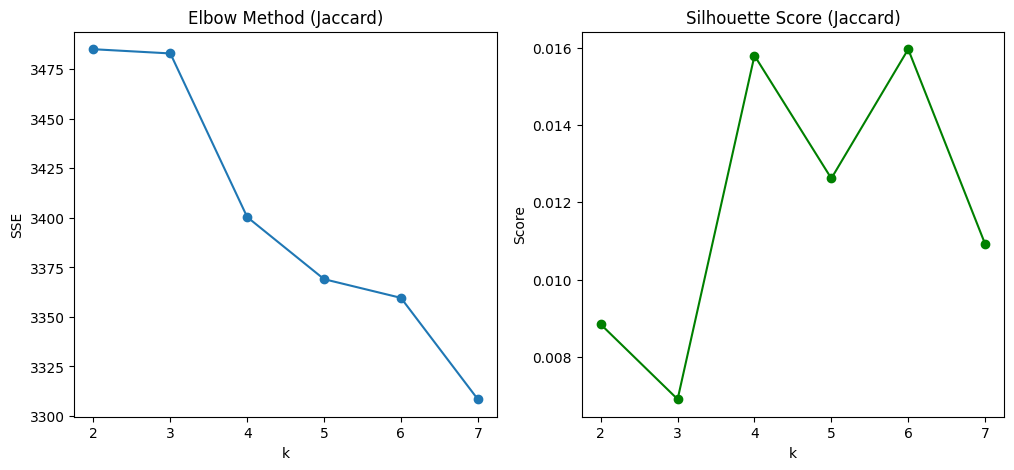

In [20]:
# Plot Elbow and Silhouette
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(ks, inertias, marker='o')
plt.title("Elbow Method (Jaccard)")
plt.xlabel("k")
plt.ylabel("SSE")

plt.subplot(1,2,2)
plt.plot(ks, silhouettes, marker='o', color='green')
plt.title("Silhouette Score (Jaccard)")
plt.xlabel("k")
plt.ylabel("Score")
plt.show()


k = 6 seems like the best number of clusters, as:

- It has the highest silhouette score.

- It aligns with a sharp SSE drop, which is typical of the elbow point.



In [21]:
k = 6
centroids = random.sample(tweets, k)
max_iter = 20

for _ in range(max_iter):
    clusters = {j: [] for j in range(k)}
    for tweet in tweets:
        dists = []
        for c in centroids:
            inter = set(tweet) & set(c)
            union = set(tweet) | set(c)
            jaccard = 1 - len(inter) / len(union) if union else 1
            dists.append(jaccard)
        min_idx = dists.index(min(dists))
        clusters[min_idx].append((tweet, min(dists)))

    new_centroids = []
    for cl in clusters.values():
        min_sum = float('inf')
        best = None
        for i in range(len(cl)):
            total = 0
            for j in range(len(cl)):
                if i != j:
                    inter = set(cl[i][0]) & set(cl[j][0])
                    union = set(cl[i][0]) | set(cl[j][0])
                    dist = 1 - len(inter) / len(union) if union else 1
                    total += dist
            if total < min_sum:
                min_sum = total
                best = cl[i][0]
        new_centroids.append(best)

    same = all(" ".join(a) == " ".join(b) for a, b in zip(centroids, new_centroids))
    centroids = new_centroids
    if same:
        break


In [22]:
print("=== Cluster Themes and Example Tweets ===\n")
cluster_df = []

for i, cluster in clusters.items():
    print(f"\n Cluster {i + 1}: ({len(cluster)} tweets)")
    words = [word for tweet, _ in cluster for word in tweet]
    common = Counter(words).most_common(5)
    keywords = [w for w, _ in common]
    print("  Top Keywords:", ', '.join(keywords))
    print("  Sample Tweets:")
    for tweet, _ in cluster[:5]:
        print("     •", " ".join(tweet))
    print()

    # Save for export
    for tweet, _ in cluster:
        cluster_df.append((" ".join(tweet), i + 1, ", ".join(keywords)))


=== Cluster Themes and Example Tweets ===


 Cluster 1: (2263 tweets)
  Top Keywords: to, for, ebola, of, the
  Sample Tweets:
     • gp workload harming care bma poll
     • short peoples heart risk greater
     • new approach against hiv promising
     • video overhaul needed for endoflife care
     • care for dying needs overhaul


 Cluster 2: (31 tweets)
  Top Keywords: due, cigarette, report, packaging, video
  Sample Tweets:
     • contaminated blood probe report due
     • mps back standardised cigarette packs
     • cigarette plain packaging vote due
     • baby deaths inquiry report due
     • cigarette packet law would save lives


 Cluster 3: (698 tweets)
  Top Keywords: video, cancer, to, of, a
  Sample Tweets:
     • breast cancer risk test devised
     • video all day is empty what am i going to do
     • video skin cancer spike from 60s holidays
     • skin cancer linked to holiday boom
     • video welcome to the designer asylum


 Cluster 4: (474 tweets)
  Top Keywords

In [23]:
df = pd.DataFrame(cluster_df, columns=["Tweet", "Cluster", "Keywords"])


In [30]:
df['Keywords'].unique()

array(['to, for, ebola, of, the',
       'due, cigarette, report, packaging, video',
       'video, cancer, to, of, a', 'nhs, over, video, to, warning',
       'in, video, ebola, uk, the', 'surgery, young, video, heart, for'],
      dtype=object)

In [31]:
label_map = {
    1: 'Ebola / General',
    2: 'Smoking / Packaging',
    3: 'Cancer Info',
    4: 'NHS Warnings',
    5: 'Ebola in UK',
    6: 'Surgery & Youth'
}

df['Label'] = df['Cluster'].map(label_map)


In [33]:
df.drop(columns= 'Keywords', axis=1, inplace= True)

In [35]:
df.sample(10)

,Tweet,Cluster,Label
3661,pill reduces hairloss in alopecia,5,Ebola in UK
183,canada to allow assisted suicide,1,Ebola / General
440,brain scan call for mild strokes,1,Ebola / General
2804,video millions lost to missed appointments,3,Cancer Info
2652,video diarrhoea treatment saves millions,3,Cancer Info
993,audio shift work increases diabetes risk,1,Ebola / General
2476,video i was terrified to be around food,3,Cancer Info
1993,emotional scars of typhoon haiyan,1,Ebola / General
1102,water will help cut child obesity,1,Ebola / General
2548,video sir ian botham on his dads dementia,3,Cancer Info
